In [10]:
import dynamiqs as dq
import jax.numpy as jnp
import jax
from dynamiqs import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N=30 #Hilbert space dimension
n=2 #number Fock state
alpha=2 #coherent state amplitude

In [6]:
fock_state=fock_dm(N, n)
coherent_state=coherent_dm(N, alpha)
xvec, yvec,W_coherent=wigner(coherent_state, 5,5)
xvec, yvec,W_fock = wigner(fock_state,5,5)

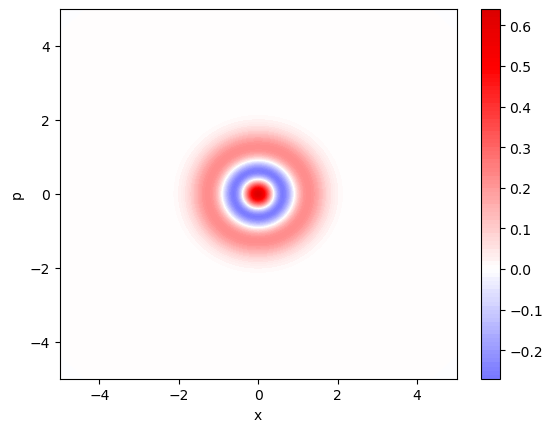

In [7]:
plt.contourf(xvec, yvec,W_fock, levels=100,cmap="seismic", vmax=1, vmin=-1)
plt.xlabel("x")
plt.ylabel("p")
plt.colorbar()

In [25]:
fock_state.shape[0]

30

In [22]:
dim_old = N
dim_new = 50

rho=dq.to_numpy(fock_state)

rho_new = np.zeros((dim_new, dim_new), dtype=complex)
rho_new[:dim_old, :dim_old] = rho

state=dq.to_qutip(rho_new)

displ_vector = 1.2 + 0.5j

displace_op = dq.displace(dim_new, displ_vector)

state_displaced= displace_op@state@displace_op.dag()


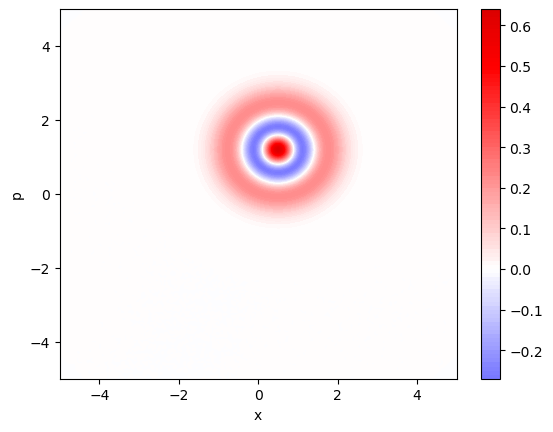

In [24]:
xvec, yvec,W = wigner(state_displaced,5,5)
plt.contourf(xvec, yvec,W, levels=100,cmap="seismic", vmax=1, vmin=-1)
plt.xlabel("x")
plt.ylabel("p")
plt.colorbar()